<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Sentiment Analysis System</b></div>

</div>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Sentiment Analysis System using BERT, Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        positive         
        neutral             
        negative          
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [2]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'scipy'

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [39]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
dataset = pd.read_excel('Articles Dataset.xlsx')
dataset = pd.DataFrame(dataset)
#Load the Training Data
print(" Dataset:")
print("=============\n")
dataset

 Dataset:



,section,title,subtitle,title_img_src,author
0,NATIONAL,Nepal condemns concert attacks near Moscow,"Government of Nepal, in line with its principl...",https://assets-api.kathmandupost.com/thumb.php...,By Post Report
1,NATIONAL,China wants to take DPM Shrestha’s visit as an...,Chinese foreign ministry says China wants to b...,https://assets-api.kathmandupost.com/thumb.php...,By Post Report
2,NATIONAL,Ministry announces Shrestha's China visit,A Cabinet meeting on Thursday had endorsed Shr...,https://assets-api.kathmandupost.com/thumb.php...,By Post Report
3,NATIONAL,Punya Prasad’s journey: From traditional farme...,He has invested Rs60 million in the Sakhiya Fi...,https://assets-api.kathmandupost.com/thumb.php...,By Dipendra Baduwal
4,NATIONAL,"Envoys, consuls call for global peace from Lum...",Deputy PM Shrestha says Nepal is ready to revi...,https://assets-api.kathmandupost.com/thumb.php...,By Manoj Poudel
...,...,...,...,...,...
10219,VISUAL STORIES,Microfinance borrowers protest in Kathmandu,"Their demands include scrapping microfinances,...",https://assets-api.kathmandupost.com/thumb.php...,By Post Report
10220,VISUAL STORIES,The week in 11 photos,Here are some of the photos taken by our photo...,https://assets-api.kathmandupost.com/thumb.php...,By Post Report
10221,VISUAL STORIES,Saraswati Puja marked across the country,"Devotees, especially students, have been visit...",https://assets-api.kathmandupost.com/thumb.php...,By Post Report
10222,VISUAL STORIES,The week in 10 photos,Here are some of the photos taken by our photo...,https://assets-api.kathmandupost.com/thumb.php...,By Post Report


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [40]:
dataset = dataset.drop(columns=['title_img_src', 'author'])

In [41]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (10224, 3)


In [42]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['section', 'title', 'subtitle'], dtype='object')


In [43]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

section     object
title       object
subtitle    object
dtype: object


In [44]:
dataset.describe(include='all')

,section,title,subtitle
count,10224,10224,9948
unique,44,1066,1029
top,NATIONAL,Three arrested in connection with baby ‘theft’...,Here are some of the photos taken by our photo...
freq,240,24,100


In [45]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

In [46]:
show_details(dataset)

,section,title,subtitle
Missed_Values,0.000000,0.000000,276.000000
Missed_Values %,0.000000,0.000000,0.026995
Duplicated values,8982.000000,8982.000000,8982.000000
Duplicated values %,0.878521,0.878521,0.878521


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

## Remove Duplicate, Null, and Missing Values

In [47]:
# dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

,section,title,subtitle
Missed_Values,0.000000,0.000000,0.000000
Missed_Values %,0.000000,0.000000,0.000000
Duplicated values,8729.000000,8729.000000,8729.000000
Duplicated values %,0.877463,0.877463,0.877463


In [48]:
dataset.shape

(9948, 3)

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text

In [51]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['subtitle'] = dataset['subtitle'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
dataset.head(20)


Training Data After Pre-processing:



,section,title,subtitle
0,NATIONAL,Nepal condemns concert attacks near Moscow,government nepal line principled position uneq...
1,NATIONAL,China wants to take DPM Shrestha’s visit as an...,chinese foreign ministry says china wants buil...
2,NATIONAL,Ministry announces Shrestha's China visit,cabinet meeting thursday endorsed shresthas vi...
3,NATIONAL,Punya Prasad’s journey: From traditional farme...,invested million sakhiya fish resort goto spot...
4,NATIONAL,"Envoys, consuls call for global peace from Lum...",deputy shrestha says nepal ready revise laws a...
5,NATIONAL,Some Rolpa schools are teaching students livel...,students cultivate crops rear livestock make h...
6,NATIONAL,"Nepal, Qatar to sign nine agreements during Em...",qatar deep pockets interested investing big pr...
7,NATIONAL,Law revision must for transitional justice pro...,parties disagree categorising killings indirec...
8,NATIONAL,Fishermen disrupt East-West highway,agitated protestors allege nea issued industri...
11,NATIONAL,Ward chair arrested on rape charge,police said found crucial evidence suspect rem...


In [52]:
# Resetting the index
dataset = dataset.reset_index(drop=True)
dataset

,section,title,subtitle
0,NATIONAL,Nepal condemns concert attacks near Moscow,government nepal line principled position uneq...
1,NATIONAL,China wants to take DPM Shrestha’s visit as an...,chinese foreign ministry says china wants buil...
2,NATIONAL,Ministry announces Shrestha's China visit,cabinet meeting thursday endorsed shresthas vi...
3,NATIONAL,Punya Prasad’s journey: From traditional farme...,invested million sakhiya fish resort goto spot...
4,NATIONAL,"Envoys, consuls call for global peace from Lum...",deputy shrestha says nepal ready revise laws a...
...,...,...,...
9943,VISUAL STORIES,Microfinance borrowers protest in Kathmandu,demands include scrapping microfinances writin...
9944,VISUAL STORIES,The week in 11 photos,photos taken photojournalists reporters week
9945,VISUAL STORIES,Saraswati Puja marked across the country,devotees especially students visiting temples ...
9946,VISUAL STORIES,The week in 10 photos,photos taken photojournalists reporters week


# Data Annotation

# BERT SENTIMENT ANALYSIS

    The model is capable of analyzing comments and extracting sentiments such as positive, negative, or neutral.

### Features
    Sentiment Classification: The model can classify user comments into positive, negative, or neutral sentiments, providing an overall indication of the expressed opinion.

In [ ]:
pip install transformers

In [53]:
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline with BERT model
sentiment_pipeline = pipeline("sentiment-analysis", model="MarieAngeA13/Sentiment-Analysis-BERT")

In [63]:
# Function to get sentiment labels and scores
def get_sentiment(text):
    result = sentiment_pipeline(text)
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    return sentiment_label, sentiment_score  

# Apply the function to each row in the DataFrame
dataset[['titlesentiment', 'titlesentiment_score']] = dataset['title'].apply(lambda x: pd.Series(get_sentiment(x)))

# Print the updated DataFrame
dataset

,section,title,subtitle,subtitlesentiment,subtitlesentiment_score,titlesentiment,titlesentiment_score
0,NATIONAL,Nepal condemns concert attacks near Moscow,government nepal line principled position uneq...,negative,0.677928,negative,0.771553
1,NATIONAL,China wants to take DPM Shrestha’s visit as an...,chinese foreign ministry says china wants buil...,positive,0.577057,neutral,0.696884
2,NATIONAL,Ministry announces Shrestha's China visit,cabinet meeting thursday endorsed shresthas vi...,neutral,0.923491,neutral,0.934679
3,NATIONAL,Punya Prasad’s journey: From traditional farme...,invested million sakhiya fish resort goto spot...,neutral,0.809757,positive,0.531715
4,NATIONAL,"Envoys, consuls call for global peace from Lum...",deputy shrestha says nepal ready revise laws a...,neutral,0.755745,neutral,0.701732
...,...,...,...,...,...,...,...
9943,VISUAL STORIES,Microfinance borrowers protest in Kathmandu,demands include scrapping microfinances writin...,neutral,0.526482,neutral,0.520081
9944,VISUAL STORIES,The week in 11 photos,photos taken photojournalists reporters week,neutral,0.964093,neutral,0.958788
9945,VISUAL STORIES,Saraswati Puja marked across the country,devotees especially students visiting temples ...,neutral,0.762886,neutral,0.935061
9946,VISUAL STORIES,The week in 10 photos,photos taken photojournalists reporters week,neutral,0.964093,neutral,0.960048


In [54]:
# Apply the function to each row in the DataFrame
dataset[['subtitlesentiment', 'subtitlesentiment_score']] = dataset['subtitle'].apply(lambda x: pd.Series(get_sentiment(x)))

# Print the updated DataFrame
dataset

,section,title,subtitle,subtitlesentiment,subtitlesentiment_score
0,NATIONAL,Nepal condemns concert attacks near Moscow,government nepal line principled position uneq...,negative,0.677928
1,NATIONAL,China wants to take DPM Shrestha’s visit as an...,chinese foreign ministry says china wants buil...,positive,0.577057
2,NATIONAL,Ministry announces Shrestha's China visit,cabinet meeting thursday endorsed shresthas vi...,neutral,0.923491
3,NATIONAL,Punya Prasad’s journey: From traditional farme...,invested million sakhiya fish resort goto spot...,neutral,0.809757
4,NATIONAL,"Envoys, consuls call for global peace from Lum...",deputy shrestha says nepal ready revise laws a...,neutral,0.755745
...,...,...,...,...,...
9943,VISUAL STORIES,Microfinance borrowers protest in Kathmandu,demands include scrapping microfinances writin...,neutral,0.526482
9944,VISUAL STORIES,The week in 11 photos,photos taken photojournalists reporters week,neutral,0.964093
9945,VISUAL STORIES,Saraswati Puja marked across the country,devotees especially students visiting temples ...,neutral,0.762886
9946,VISUAL STORIES,The week in 10 photos,photos taken photojournalists reporters week,neutral,0.964093


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [65]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['section', 'title', 'subtitle', 'subtitlesentiment',
       'subtitlesentiment_score', 'titlesentiment', 'titlesentiment_score'],
      dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 9948


In [66]:
dataset.describe()

,subtitlesentiment_score,titlesentiment_score
count,9948.000000,9948.000000
mean,0.737788,0.782883
std,0.145449,0.149363
min,0.390157,0.413334
25%,0.617543,0.655515
50%,0.762703,0.824625
75%,0.867312,0.919164
max,0.964909,0.975701


In [67]:
print('The Count of Sub titles sentiments in the dataset : \n')
Sentiment =dataset.subtitlesentiment.value_counts()
Sentiment.to_frame().T

The Count of Sub titles sentiments in the dataset : 



,neutral,negative,positive
subtitlesentiment,5295,3073,1580


In [68]:
print('The Count of  titles sentiments in the dataset : \n')
Sentiment =dataset.titlesentiment.value_counts()
Sentiment.to_frame().T

The Count of  titles sentiments in the dataset : 



,neutral,negative,positive
titlesentiment,6185,2953,810


In [69]:
print(f'The unique values of Sentiments in Titles and Subtitles : {len(dataset.subtitlesentiment.unique())}')
print('**' * 20)
print(dataset.subtitlesentiment.unique())

The unique values of Sentiments in Titles and Subtitles : 3
****************************************
['negative' 'positive' 'neutral']



Number of instances and Sub title Sentiment in the Dataset:



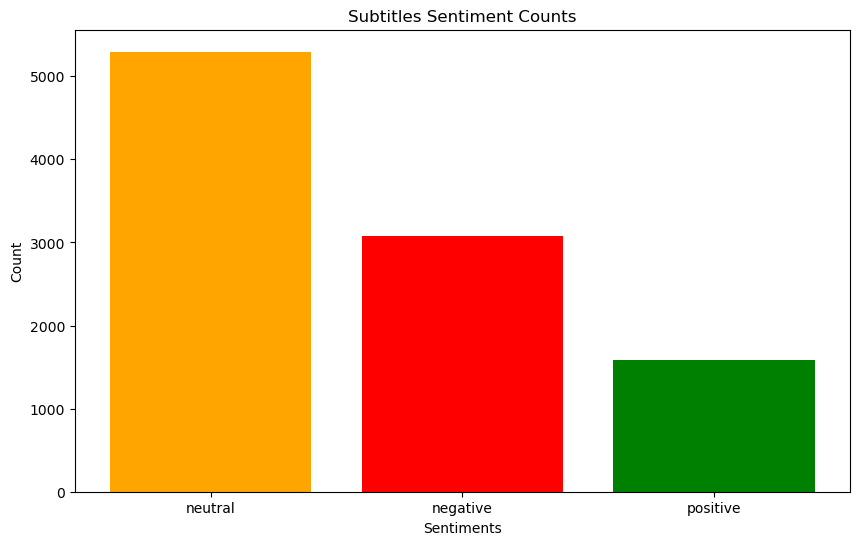

In [70]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Sub title Sentiment in the Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['subtitlesentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Subtitles Sentiment Counts')

# Show the bar graph
plt.show()



Number of instances and Title Sentiment in the Dataset:



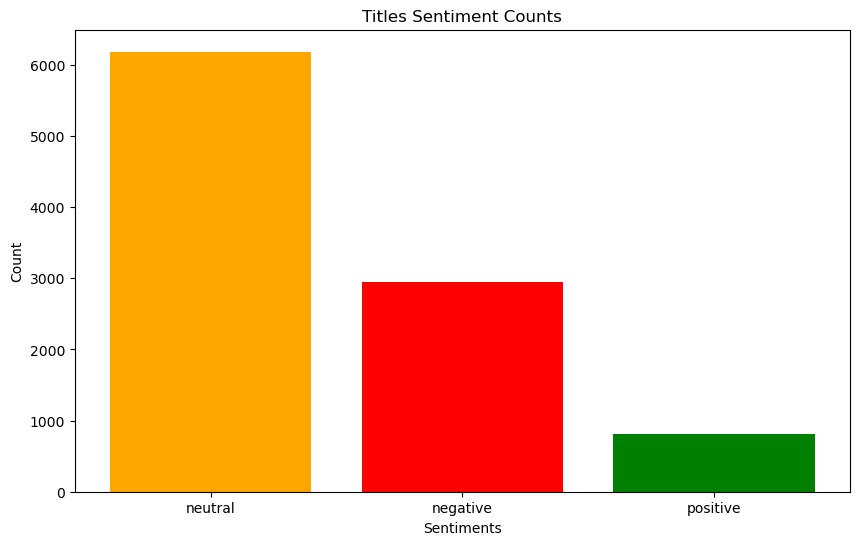

In [72]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Title Sentiment in the Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['titlesentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Titles Sentiment Counts')

# Show the bar graph
plt.show()


In [75]:
import plotly.graph_objects as go

sentiment_counts = dataset['subtitlesentiment'].value_counts().sort_index()

sentiment_labels = ['negative', 'neutral', 'positive']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sub Title Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


In [76]:
import plotly.graph_objects as go

sentiment_counts = dataset['titlesentiment'].value_counts().sort_index()

sentiment_labels = ['negative', 'neutral', 'positive']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Title Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


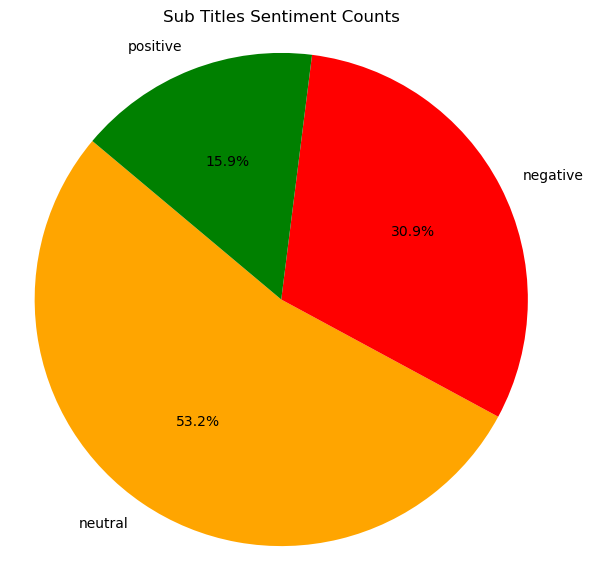

In [77]:
sentiment_counts = dataset['subtitlesentiment'].value_counts()

# Define colors for each sentiment
colors = {'negative': 'red', 'positive': 'green', 'neutral': 'orange'}

# Create a pie chart with custom colors
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sub Titles Sentiment Counts')

# Display the pie chart
plt.show()

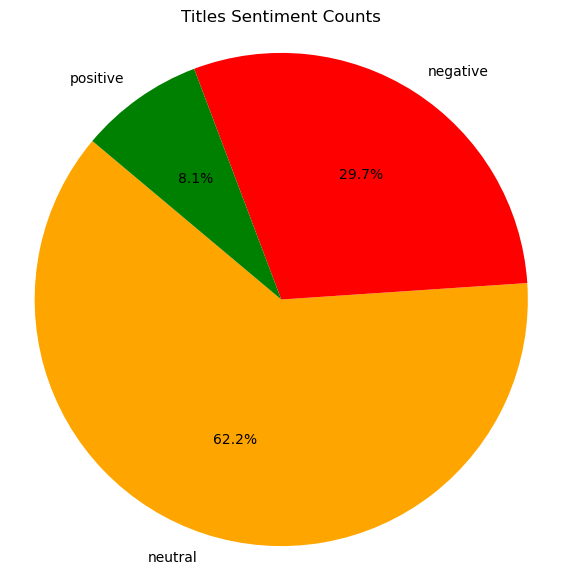

In [78]:
sentiment_counts = dataset['titlesentiment'].value_counts()

# Define colors for each sentiment
colors = {'negative': 'red', 'positive': 'green', 'neutral': 'orange'}

# Create a pie chart with custom colors
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Titles Sentiment Counts')

# Display the pie chart
plt.show()

## Shape of the Training Data

In [79]:
dataset.shape

(9948, 7)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [80]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['subtitle'].apply(word_tokenize)
Tokens = Tokens.to_frame()
Tokens['Token_Length'] = preprocessed_dataset['subtitle'].str.split().apply(lambda x : [len(i) for i in x])
print("\n Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


 Data After Tokenization :



,subtitle,Token_Length
0,"[government, nepal, line, principled, position...","[10, 5, 4, 10, 8, 13, 8, 9, 5, 14, 4, 8, 7, 7]"
1,"[chinese, foreign, ministry, says, china, want...","[7, 7, 8, 4, 5, 5, 5, 10, 9, 11, 11, 9, 10, 11..."
2,"[cabinet, meeting, thursday, endorsed, shresth...","[7, 7, 8, 8, 9, 5, 8, 9]"


### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [81]:
preprocessed_dataset['subtitle length'] = preprocessed_dataset['subtitle'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['subtitle'].apply(lambda x: len(str(x).split()))
preprocessed_dataset.head(20)

,section,title,subtitle,subtitlesentiment,subtitlesentiment_score,titlesentiment,titlesentiment_score,subtitle length,word_count
0,NATIONAL,Nepal condemns concert attacks near Moscow,government nepal line principled position uneq...,negative,0.677928,negative,0.771553,125,14
1,NATIONAL,China wants to take DPM Shrestha’s visit as an...,chinese foreign ministry says china wants buil...,positive,0.577057,neutral,0.696884,136,15
2,NATIONAL,Ministry announces Shrestha's China visit,cabinet meeting thursday endorsed shresthas vi...,neutral,0.923491,neutral,0.934679,68,8
3,NATIONAL,Punya Prasad’s journey: From traditional farme...,invested million sakhiya fish resort goto spot...,neutral,0.809757,positive,0.531715,67,10
4,NATIONAL,"Envoys, consuls call for global peace from Lum...",deputy shrestha says nepal ready revise laws a...,neutral,0.755745,neutral,0.701732,71,10
5,NATIONAL,Some Rolpa schools are teaching students livel...,students cultivate crops rear livestock make h...,positive,0.520802,neutral,0.856684,120,14
6,NATIONAL,"Nepal, Qatar to sign nine agreements during Em...",qatar deep pockets interested investing big pr...,neutral,0.604015,neutral,0.921797,91,12
7,NATIONAL,Law revision must for transitional justice pro...,parties disagree categorising killings indirec...,negative,0.599980,neutral,0.733476,106,11
8,NATIONAL,Fishermen disrupt East-West highway,agitated protestors allege nea issued industri...,negative,0.817335,negative,0.640425,160,22
9,NATIONAL,Ward chair arrested on rape charge,police said found crucial evidence suspect rem...,neutral,0.876985,negative,0.549945,80,10



Text Length in Sub Title Sentiment in the Dataset:



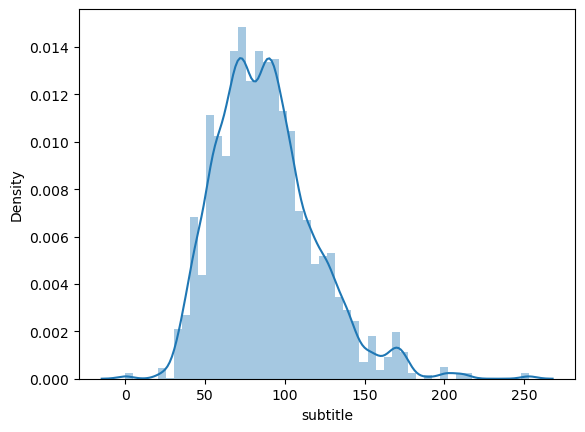

In [83]:
import seaborn as sns
print("\nText Length in Sub Title Sentiment in the Dataset:")
print("======================================================\n")
text_length=preprocessed_dataset['subtitle'].str.len()
sns.distplot(text_length)
plt.show()


Text Length in Title Sentiment in the Dataset:



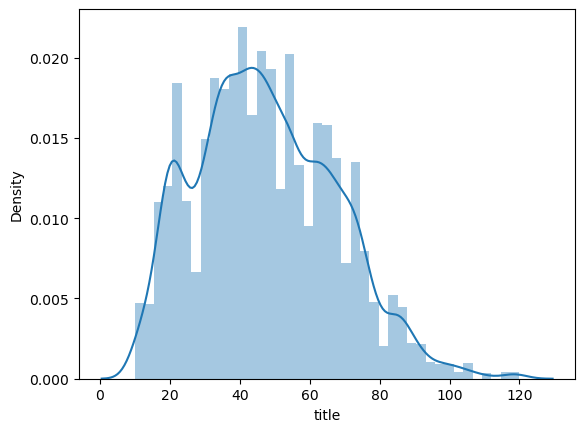

In [82]:
import seaborn as sns
print("\nText Length in Title Sentiment in the Dataset:")
print("======================================================\n")
text_length=preprocessed_dataset['title'].str.len()
sns.distplot(text_length)
plt.show()

In [85]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)


Top words in Sub Title in the Dataset:



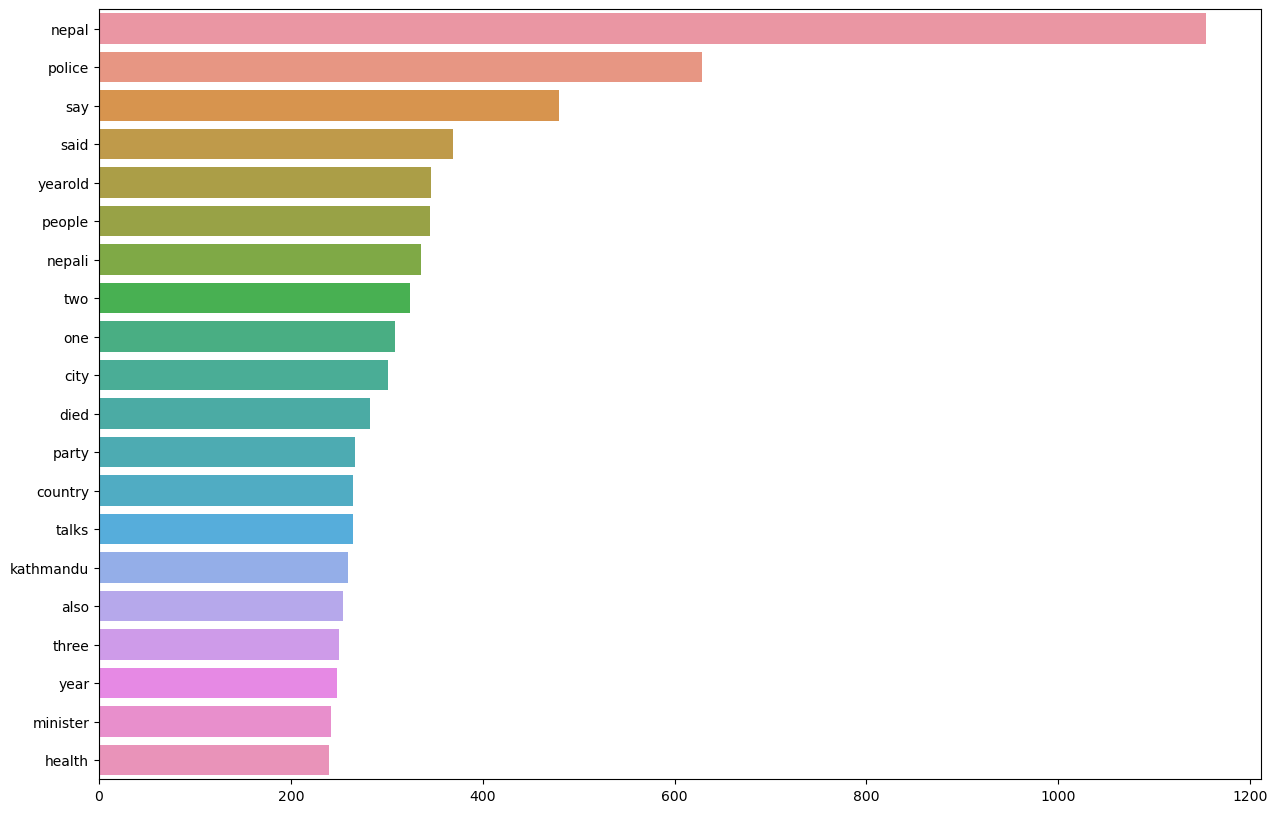

In [88]:
print("\nTop words in Sub Title in the Dataset:")
print("========================================\n")
plot_top_non_stopwords_barchart(preprocessed_dataset['subtitle'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

In [39]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.2 kB 72.8 kB/s e

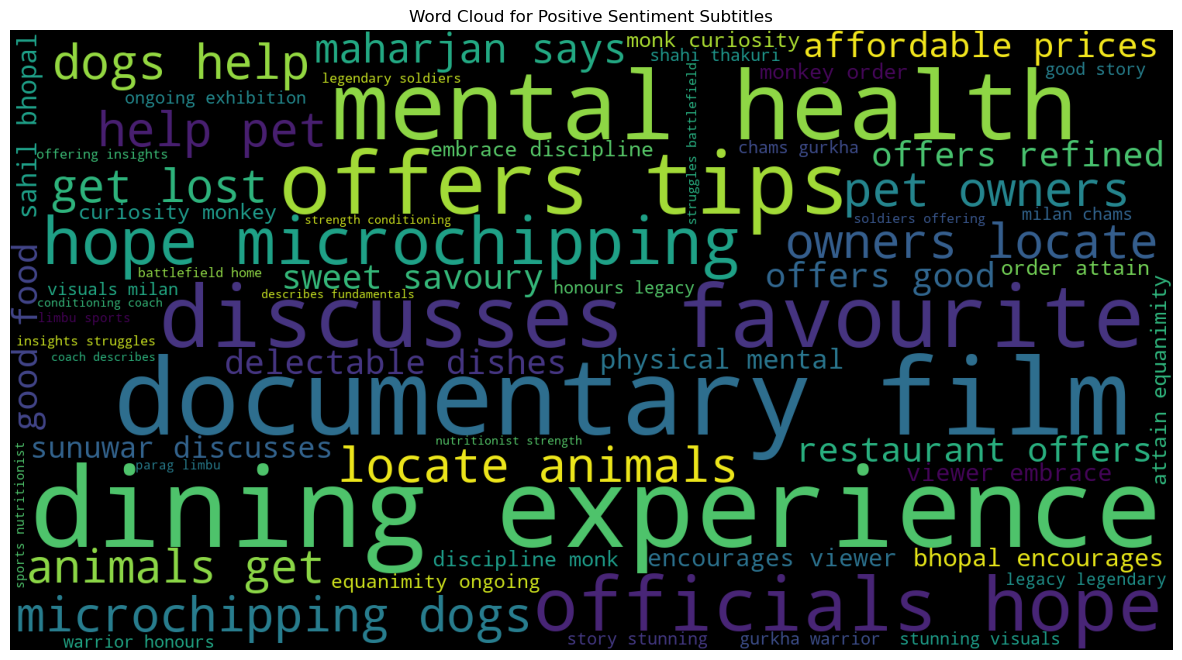

In [89]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
positive_reviews = dataset[dataset['subtitlesentiment'] == 'positive']['subtitle']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Sentiment Subtitles')
plt.axis('off')
plt.show()

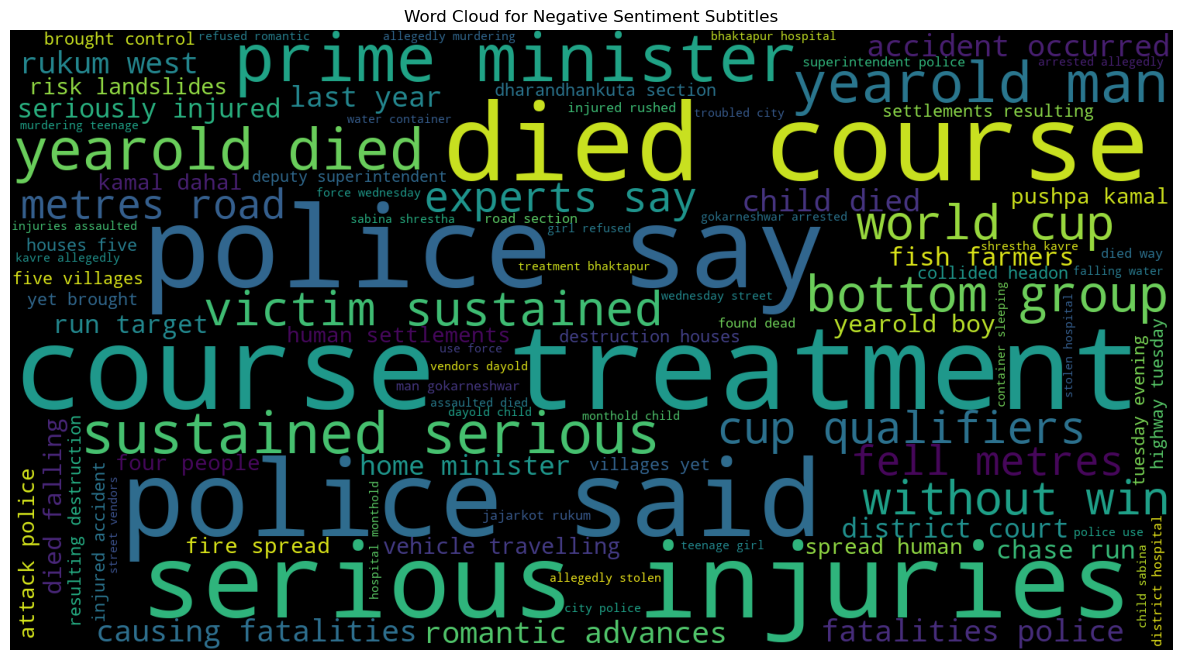

In [90]:
negative_reviews = dataset[dataset['subtitlesentiment'] == 'negative']['subtitle']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Sentiment Subtitles')
plt.axis('off')
plt.show()

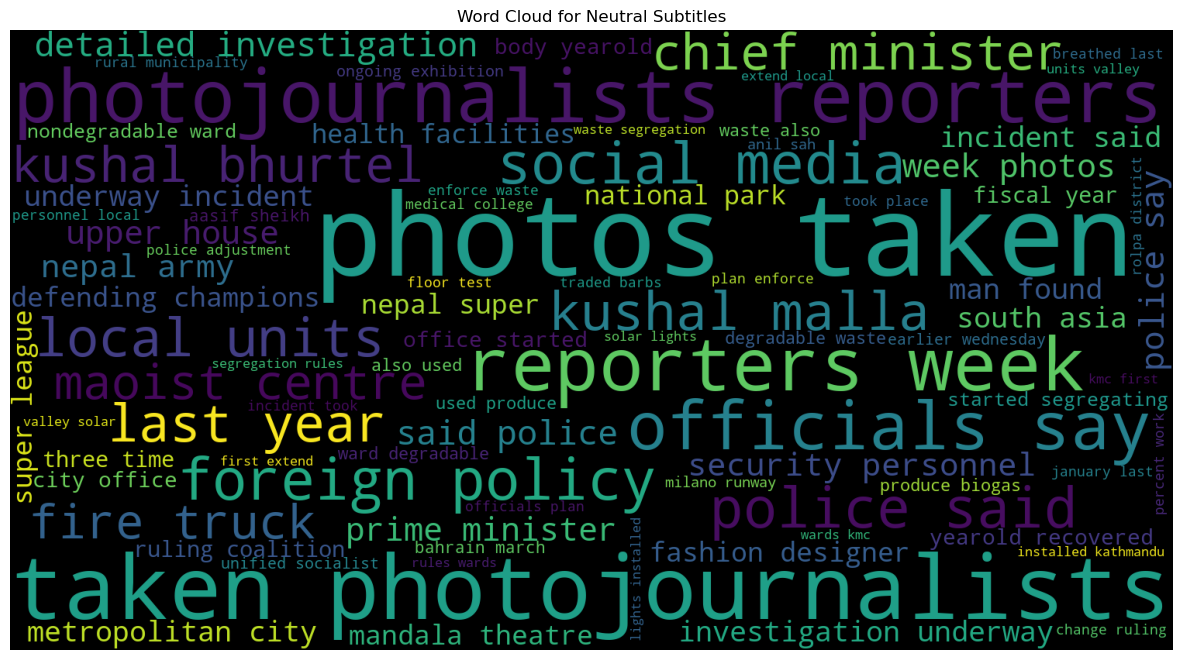

In [91]:
neutral_reviews = dataset[dataset['subtitlesentiment'] == 'neutral']['subtitle']
pos = ' '.join(map(str, neutral_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Subtitles')
plt.axis('off')
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [94]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['subtitle'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
print("\nFrequency of Words in Sub Titles in the Dataset:")
print("======================================================\n")
df1


Frequency of Words in Sub Titles in the Dataset:



,Word,count
0,nepal,1154
1,police,629
2,say,479
3,said,369
4,yearold,346
5,people,345
6,nepali,336
7,two,324
8,one,309
9,city,301


Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency in Subtitles'}, xlabel='Top Words', ylabel='Count'>

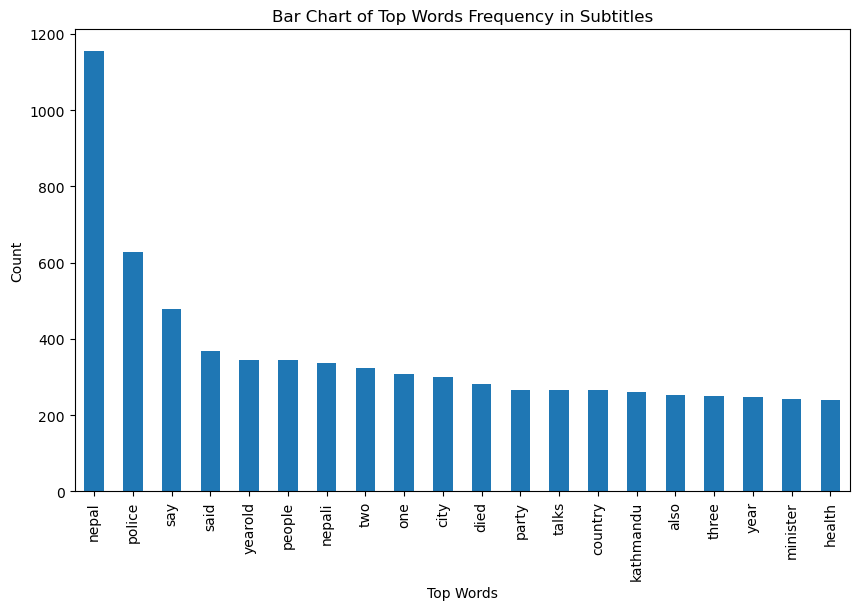

In [95]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency in Subtitles"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [96]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['subtitle'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
print("\nFrequency of Bigram Words in Sub Titles in the Dataset:")
print("======================================================\n")
df2


Frequency of Bigram Words in Sub Titles in the Dataset:



,Text,Count
0,police said,121
1,police say,106
2,photos taken,100
3,taken photojournalists,100
4,photojournalists reporters,100
5,reporters week,100
6,officials say,95
7,last year,83
8,prime minister,80
9,course treatment,78


<Axes: title={'center': 'Bar chart of Bigrams Frequency in Subtitle'}, xlabel='Bigram Words', ylabel='Count'>

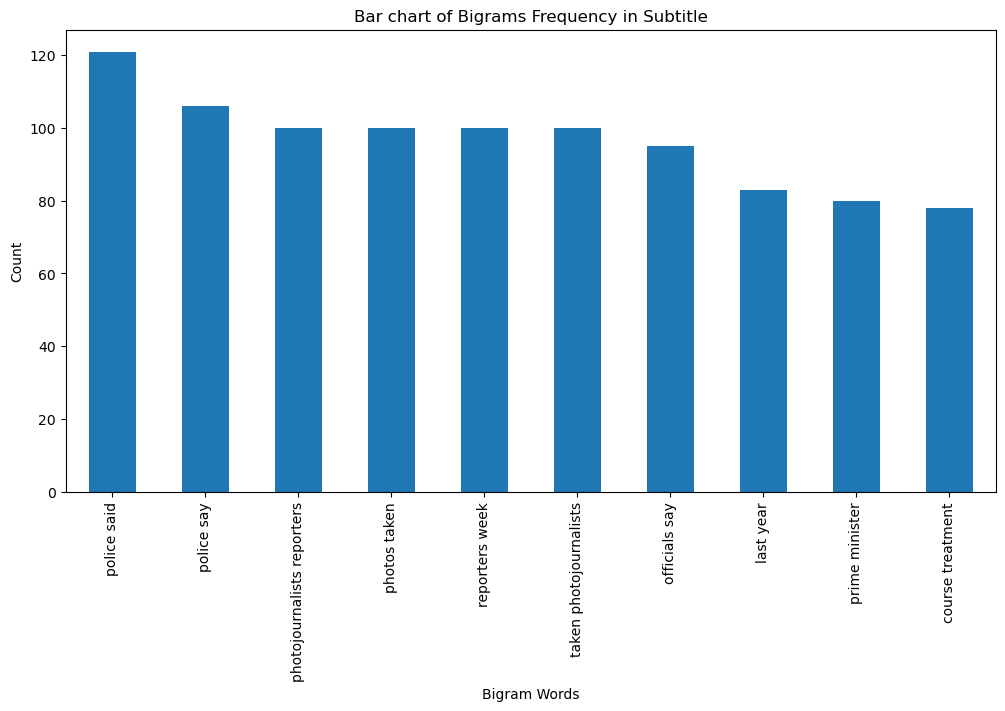

In [97]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency in Subtitle"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [98]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_dataset['subtitle']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


## Convert Input of Training Data into Feature Vectors

In [99]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



,aadhe,aadmi,aam,aap,aarif,aarohan,aasif,abandon,abhi,abhishek,...,youtube,zealand,zero,zerowaste,zika,zing,zingworld,zones,zoo,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [100]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["subtitlesentiment"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



,subtitlesentiment
0,negative
1,positive
2,neutral
3,neutral
4,neutral


In [102]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
dataset_output['subtitlesentiment'] = label_encoder.fit_transform(dataset_output['subtitlesentiment'])

In [103]:
dataset_output

,subtitlesentiment
0,0
1,2
2,1
3,1
4,1
...,...
9943,1
9944,1
9945,1
9946,1


In [104]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [105]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [106]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


## Linear SVC Classifier

In [107]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [108]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [109]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [110]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.99


Precision Score of Random Forest Classifier:

0.99


Recall Score of Random Forest Classifier:

0.99


F1 Score of Random Forest Classifier:

0.99


In [111]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1500
           1       0.98      1.00      0.99      2677
           2       1.00      0.99      0.99       797

    accuracy                           0.99      4974
   macro avg       0.99      0.99      0.99      4974
weighted avg       0.99      0.99      0.99      4974



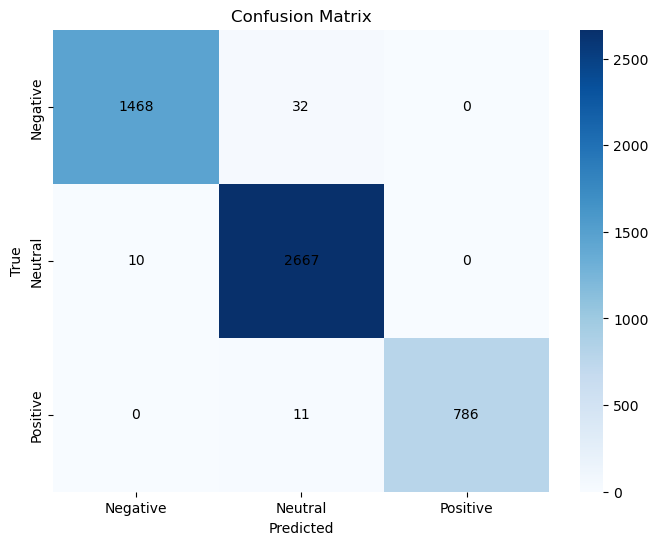

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"color": "black"}) # Ensure text color is black

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [113]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.99

precision Score of LR_claasifier:

0.99


Recall Score of LR_claasifier:

0.99


F1 Score of LR_claasifier:

0.99


In [114]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1500
           1       0.98      1.00      0.99      2677
           2       1.00      0.99      0.99       797

    accuracy                           0.99      4974
   macro avg       0.99      0.99      0.99      4974
weighted avg       0.99      0.99      0.99      4974



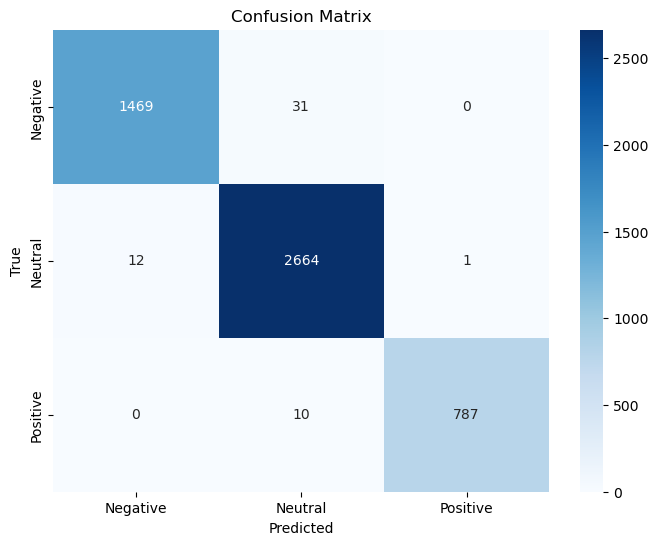

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [116]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.98


Precision Score of BernoulliNB:

0.98


Recall Score of BernoulliNB:

0.98


F1 Score of BernoulliNB:

0.98


In [117]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1500
           1       0.99      0.97      0.98      2677
           2       0.96      0.98      0.97       797

    accuracy                           0.98      4974
   macro avg       0.97      0.98      0.98      4974
weighted avg       0.98      0.98      0.98      4974



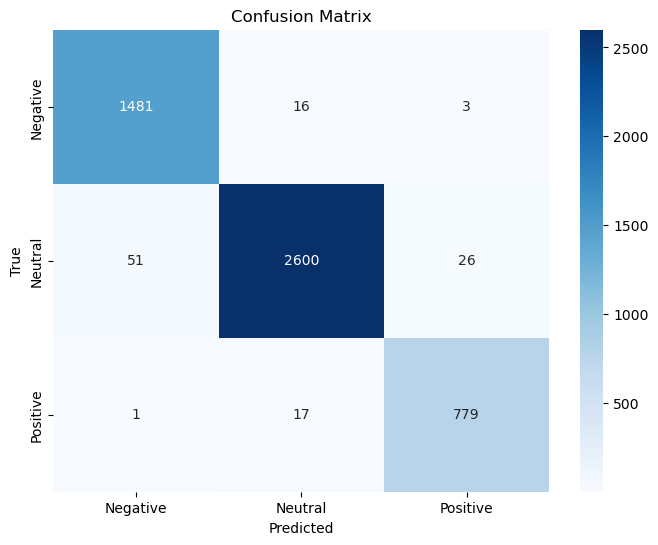

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [119]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.99

precision Score of LinearSVC:

0.99


Recall Score of LinearSVC:

0.99


F1 Score of LinearSVC:

0.99


In [120]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1500
           1       0.99      0.99      0.99      2677
           2       1.00      0.99      0.99       797

    accuracy                           0.99      4974
   macro avg       0.99      0.99      0.99      4974
weighted avg       0.99      0.99      0.99      4974



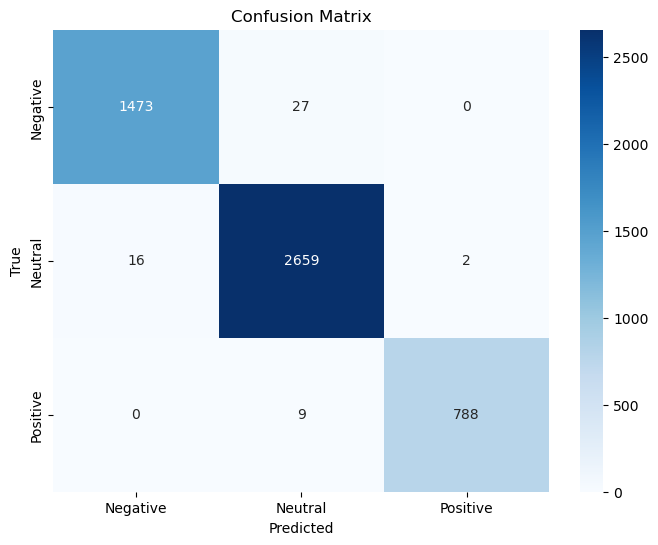

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [122]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.97

precision Score of MultinomialNB:

0.97


Recall Score of MultinomialNB:

0.97


F1 Score of MultinomialNB:

0.97


In [123]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1500
           1       0.99      0.96      0.97      2677
           2       0.93      0.99      0.96       797

    accuracy                           0.97      4974
   macro avg       0.96      0.98      0.97      4974
weighted avg       0.97      0.97      0.97      4974



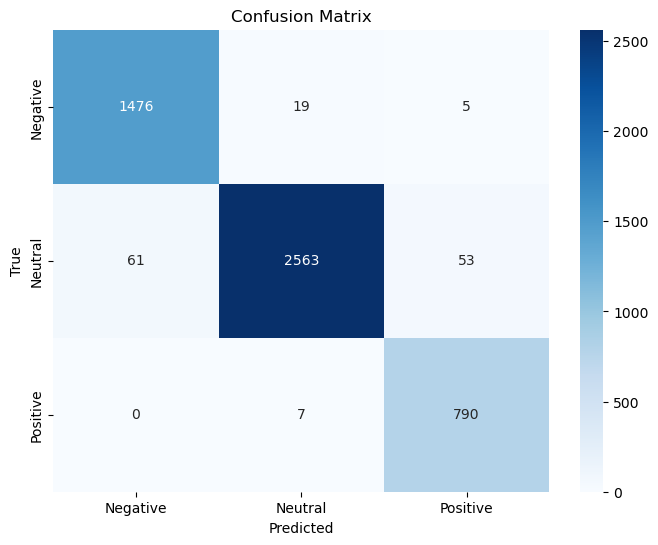

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [125]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.99   |    0.99   |  0.99  |   0.99   |
| Logistic Regression Classifier |   0.99   |    0.99   |  0.99  |   0.99   |
|     Bernoulli Naive Bayes      |   0.98   |    0.98   |  0.98  |   0.98   |
|           Linear SVC           |   0.99   |    0.99   |  0.99  |   0.99   |
|    Multinomial Naive Bayes     |   0.97   |    0.97   |  0.97  |   0.97   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------+----------+-----------+--------+----------+
|          Model           | Accuracy | Precision | Recall | f1_score |
+--------------------------+----------+-----------+--------+----------+
| Random Forest Classifi

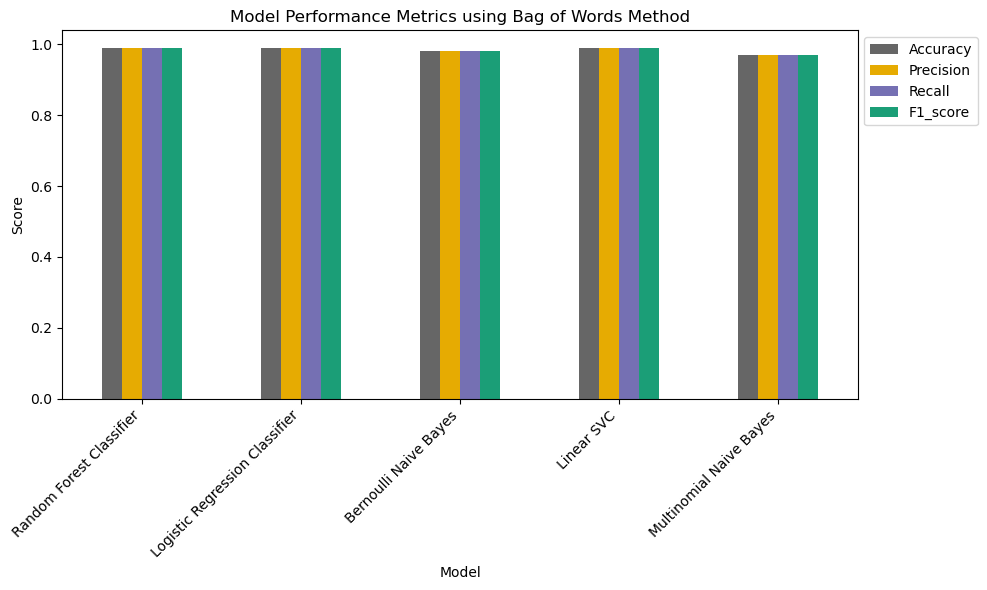

In [126]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph with rotated x-axis labels
ax = df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Dark2_r')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [127]:
filename = 'updatedTrainedModel.sav'
pickle.dump(linear_svc, open(filename, 'wb'))

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Extraction Method 2:Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including sentiment analysis and trend identification in financial data.


In [128]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 3000 Features 
train_text = preprocessed_dataset['subtitle']

# Fit the Tfidf Vectorizer on Input Text of Training Data
tfidf_vectorizer = tfidf_vectorizer.fit(train_text)


In [130]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = tfidf_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



,aadhe,aadmi,aam,aap,aarif,aarohan,aasif,abandon,abhi,abhishek,...,youtube,zealand,zero,zerowaste,zika,zing,zingworld,zones,zoo,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [132]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [136]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)



Accuracy Score of Random Forest Classifier:

0.99


Precision Score of Random Forest Classifier:

0.99


Recall Score of Random Forest Classifier:

0.99


F1 Score of Random Forest Classifier:

0.99


In [137]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       0.99      0.99      0.99      1092
           2       1.00      0.98      0.99       315

    accuracy                           0.99      1990
   macro avg       0.99      0.99      0.99      1990
weighted avg       0.99      0.99      0.99      1990



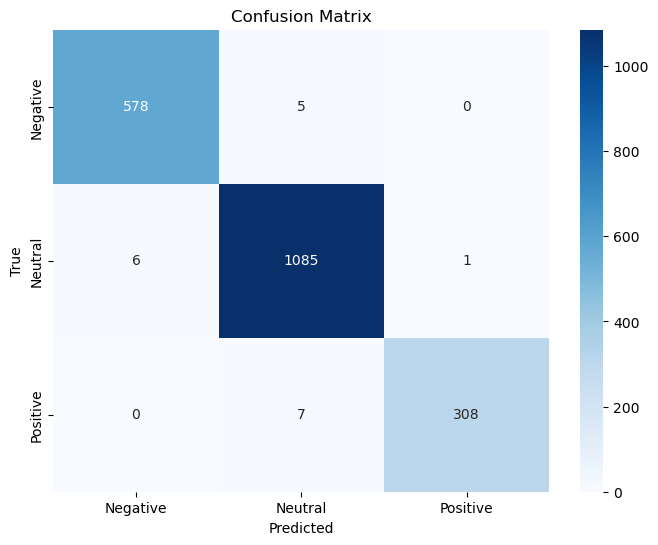

In [138]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Logistic Regression Classifier

In [139]:
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


In [140]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.99

precision Score of LR_claasifier:

0.99


Recall Score of LR_claasifier:

0.99


F1 Score of LR_claasifier:

0.99


In [141]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       583
           1       0.98      1.00      0.99      1092
           2       1.00      0.97      0.99       315

    accuracy                           0.99      1990
   macro avg       0.99      0.98      0.99      1990
weighted avg       0.99      0.99      0.99      1990



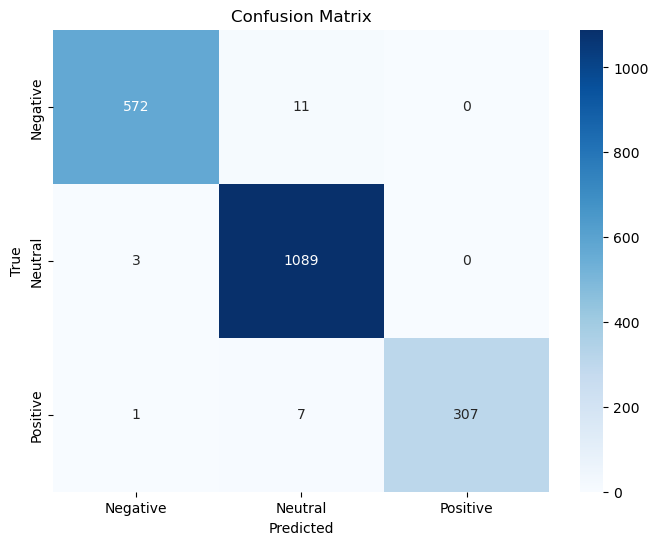

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Linear SVC

In [143]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [144]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.99

precision Score of LinearSVC:

0.99


Recall Score of LinearSVC:

0.99


F1 Score of LinearSVC:

0.99


In [145]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       0.99      0.99      0.99      1092
           2       1.00      0.98      0.99       315

    accuracy                           0.99      1990
   macro avg       0.99      0.99      0.99      1990
weighted avg       0.99      0.99      0.99      1990



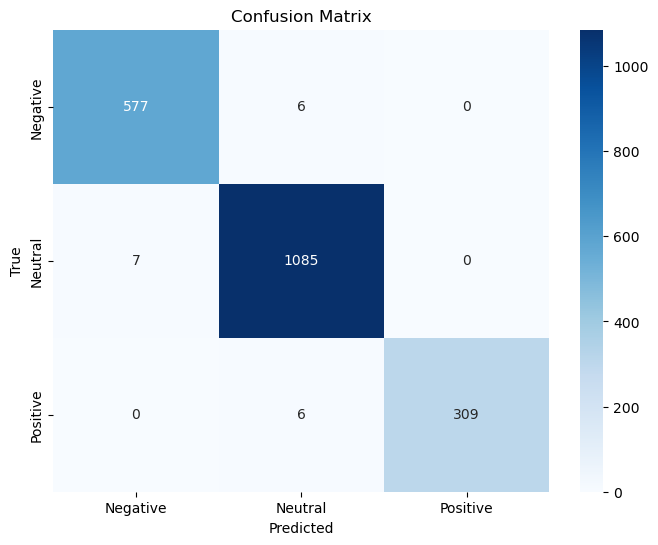

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# BernoulliNB

In [147]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [148]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.99


Precision Score of BernoulliNB:

0.98


Recall Score of BernoulliNB:

0.99


F1 Score of BernoulliNB:

0.99


In [149]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       583
           1       0.99      0.99      0.99      1092
           2       0.99      0.98      0.98       315

    accuracy                           0.99      1990
   macro avg       0.98      0.98      0.98      1990
weighted avg       0.99      0.99      0.99      1990



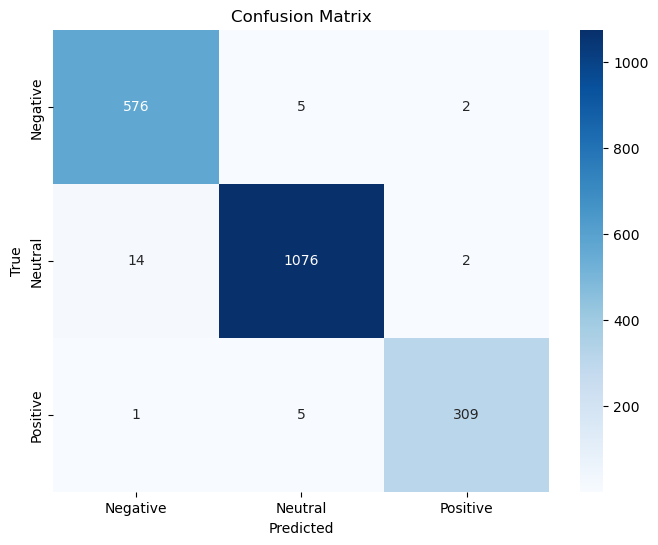

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [151]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [152]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='macro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.98

precision Score of MultinomialNB:

0.98


Recall Score of MultinomialNB:

0.98


F1 Score of MultinomialNB:

0.98


In [153]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       583
           1       0.99      0.98      0.98      1092
           2       0.99      0.98      0.98       315

    accuracy                           0.98      1990
   macro avg       0.98      0.98      0.98      1990
weighted avg       0.98      0.98      0.98      1990



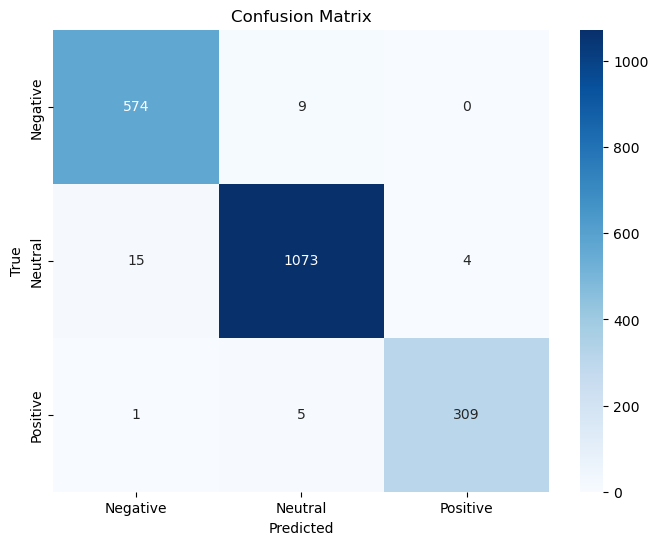

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Best Results

In [155]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.99   |    0.99   |  0.99  |   0.99   |
| Logistic Regression Classifier |   0.99   |    0.99   |  0.99  |   0.99   |
|     Bernoulli Naive Bayes      |   0.99   |    0.98   |  0.99  |   0.99   |
|           Linear SVC           |   0.99   |    0.99   |  0.99  |   0.99   |
|    Multinomial Naive Bayes     |   0.98   |    0.98   |  0.98  |   0.98   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------+----------+-----------+--------+----------+
|          Model           | Accuracy | Precision | Recall | f1_score |
+--------------------------+----------+-----------+--------+----------+
| Random Forest Classifi

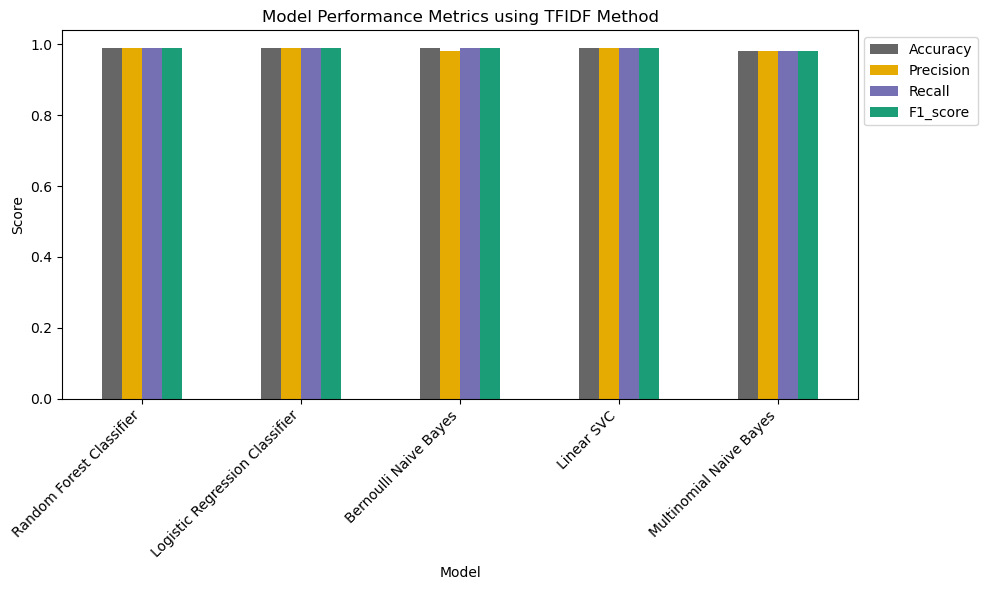

In [156]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph with rotated x-axis labels
ax = df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Dark2_r')
plt.title('Model Performance Metrics using TFIDF Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Application Phase</b></div>

In [157]:
def process_text(text):
    #store user input into numpy array
    usertext = np.empty([0,0])
    usertext = np.append(usertext, text)
    #Load saved vectorizer
    #vectorizer = pickle.load(open('trainedtfidf.pkl', 'rb'))
    fitVectorizer = count_vectorizer.transform(usertext)
    fitVectorizer = fitVectorizer.todense()
    #print(vectorizer.get_feature_names())
    countVectDF = pd.DataFrame(fitVectorizer, columns=count_vectorizer.get_feature_names_out())
    #print("\n",countVectDF)
    return countVectDF

In [158]:
def load_Model(text):
    loadedLG = pickle.load(open(filename, 'rb'))
    outputPrediction = loadedLG.predict(process_text(text))
    return outputPrediction


In [159]:
def make_Prediction(text):
    if text == 0:
        emotion ="Negative"
    elif text == 1:
        emotion ="Neutral"
    elif text == 2:
        emotion ="Positive"
    return emotion

In [160]:
from tkinter import *


with open('updatedTrainedModel.sav', 'rb') as f:
    loadedLG = pickle.load(f)

In [161]:
def detect():
    user_input = input1.get("1.0","end-1c")
    answer.config(text=make_Prediction(load_Model(user_input)))

In [163]:
root = Tk()
root.title('Sentiment Analysis System')
root.geometry('530x430')
root.resizable(width=True, height=True)

topFrame = Frame(root)
topFrame.pack()
bottomFrame = Frame(root)
bottomFrame.pack(side=BOTTOM)

label11 = Label(root, text='Sentiment Analysis System ',font=("Times 24 bold"),fg='Dark Blue').place(x = 80,y = 10)


label1 = Label(root, text='Enter the Content',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 57)
#label1.pack()

input1 = Text(root, height=6, width=40)
input1.place(x = 105,y = 90)
#input1.pack()

button1 = Button(root, text='Detect', command=detect, height=2,width=15,fg='green', bd=6,font=("Times 11 bold")).place(x = 190,y = 206)
#button1.pack()

label1 = Label(root, text='Sentiment: ',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 270)
#label1.pack()

answer = Label(root, text='' ,font=("Times 18 bold"),fg='Black')
answer.place(x = 230,y = 300)
#answer.pack()

button2 = Button(root, text='Cancel', command=quit, height=2, width=15, fg='red', bd=6,font=("Times 11 bold")).place(x = 190,y = 345)
#button2.pack()
label11 = Label(root, text='Developed by: Developer',font=("Times 8"),fg='black').place(x = 95,y = 405)
root.mainloop()